In [1]:
!pip install category_encoders

In [2]:
#import necessary libraries and packages.
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
from category_encoders import BinaryEncoder

In [3]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df=pd.read_csv('bank.csv',na_values='unknown')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes


In [6]:
#no garbage values or outliers.
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24,  1, 10, 22, 25, 31],
      dtype=int64)

In [7]:
#checking for null values and wrong datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11092 non-null  object
 2   marital    11162 non-null  object
 3   education  10665 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    8816 non-null   object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   2836 non-null   object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
#cleaning the datafram...
df.drop('poutcome',axis=1,inplace=True)
clean_df=df.dropna()
contactm=clean_df['contact'].mode().iloc[0]
edum=clean_df['education'].mode().iloc[0]
jobm=clean_df['job'].mode().iloc[0]
df.fillna({'contact':contactm},inplace=True)
df.fillna({'education':edum},inplace=True)
df.fillna({'job':jobm},inplace=True)


In [9]:
print(edum,contactm,jobm)

secondary cellular management


In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,yes


In [11]:
#no more NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [12]:
df.describe()
#no out of range numbers.

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [13]:
sampled_df=df.sample(frac=0.1)

In [14]:
for i in df.columns:
    print(df[i].unique())

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'self-employed' 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary']
['no' 'yes']
[2343   45 1270 ... 1594 2593 -134]
['yes' 'no']
['no' 'yes']
['cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[1042 1467 1389 ... 1504  818 1812]
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  9

In [15]:
#correlation for number values.
df.select_dtypes(include=['number']).corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [16]:
#function that returns month number from 3 letter abbreviation.
def month_to_num(month_name):
    return datetime.strptime(month_name,'%b').month

In [17]:
df['month']=df['month'].apply(month_to_num)

In [18]:
# Mean balance by job
df['balance_by_job'] = df.groupby('job')['balance'].transform('mean')


In [19]:
df['balance_by_job']

0        1195.866567
1        1195.866567
2        1556.294569
3        1081.171181
4        1195.866567
            ...     
11157    1203.926440
11158    1081.171181
11159    1556.294569
11160    1556.294569
11161    1556.294569
Name: balance_by_job, Length: 11162, dtype: float64

In [20]:
#binarize the categorical features.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['deposit']=le.fit_transform(df['deposit'].astype(str)) # yes = 1, no = 0
df['contact']=le.fit_transform(df['contact'].astype(str)) # telephone = 1, cellular = 0
df['loan']=le.fit_transform(df['loan'].astype(str)) # yes = 1, no = 0
df['housing']=le.fit_transform(df['housing'].astype(str)) # yes = 1, no = 0
df['default']=le.fit_transform(df['default'].astype(str)) # yes = 1, no = 0
df=pd.get_dummies(df,columns=['marital','education'])

In [21]:
encoder=BinaryEncoder()
tdf=encoder.fit_transform(df[['job']])
df=pd.concat([df,tdf],axis=1)

In [22]:
df.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit',
       'balance_by_job', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'job_0', 'job_1', 'job_2', 'job_3'],
      dtype='object')

In [23]:
df=df[['age','job_0', 'job_1', 'job_2', 'job_3', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary','default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous','balance_by_job', 'deposit']]

In [24]:
df.head()

,age,job_0,job_1,job_2,job_3,marital_divorced,marital_married,marital_single,education_primary,education_secondary,...,loan,contact,day,month,duration,campaign,pdays,previous,balance_by_job,deposit
0,59,0,0,0,1,False,True,False,False,True,...,0,0,5,5,1042,1,-1,0,1195.866567,1
1,56,0,0,0,1,False,True,False,False,True,...,0,0,5,5,1467,1,-1,0,1195.866567,1
2,41,0,0,1,0,False,True,False,False,True,...,0,0,5,5,1389,1,-1,0,1556.294569,1
3,55,0,0,1,1,False,True,False,False,True,...,0,0,5,5,579,1,-1,0,1081.171181,1
4,54,0,0,0,1,False,True,False,False,False,...,0,0,5,5,673,2,-1,0,1195.866567,1


In [25]:
# Binning age
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['young', 'middle_aged', 'senior', 'elderly'])

In [26]:
df['age_bin']

0             senior
1             senior
2        middle_aged
3             senior
4             senior
            ...     
11157    middle_aged
11158    middle_aged
11159    middle_aged
11160    middle_aged
11161    middle_aged
Name: age_bin, Length: 11162, dtype: category
Categories (4, object): ['young' < 'middle_aged' < 'senior' < 'elderly']

In [27]:
df=pd.get_dummies(df,columns=['age_bin'])
df.drop('age',axis=1,inplace=True)

### Outlier detection and handling

{'whiskers': [<matplotlib.lines.Line2D at 0x17752cb0350>,
 'caps': [<matplotlib.lines.Line2D at 0x17752bb0a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x17752bed550>],
 'medians': [<matplotlib.lines.Line2D at 0x17752cb0e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x17752cb1160>],
 'means': []}

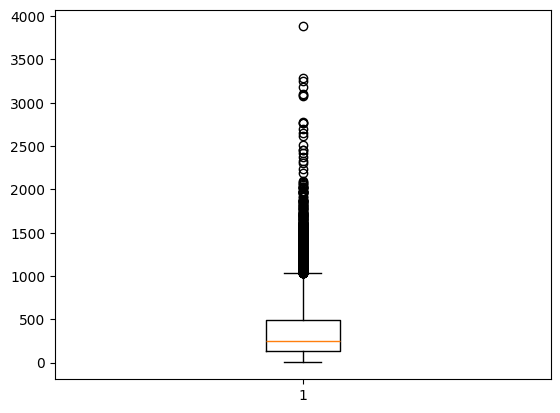

In [29]:
plt.boxplot('duration',data=df)

In [30]:
from scipy import stats
df['duration'], _ = stats.boxcox(df['duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17752d263c0>,
 'caps': [<matplotlib.lines.Line2D at 0x17752d268a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17752d26090>],
 'medians': [<matplotlib.lines.Line2D at 0x17752d26db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17752d27080>],
 'means': []}

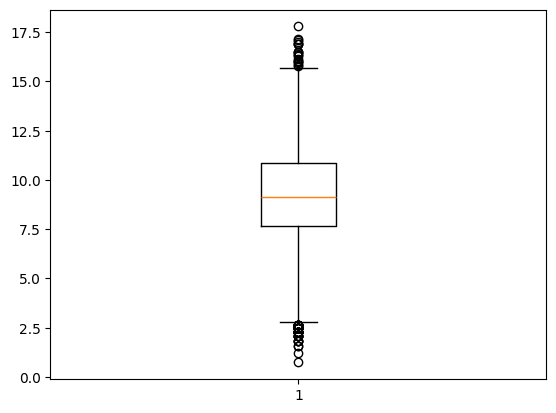

In [31]:
plt.boxplot('duration',data=df)

In [32]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
df = df[(df['duration']>=lower_bound) & (df['duration']<=upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x17752db5580>,
 'caps': [<matplotlib.lines.Line2D at 0x17752db5b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x17752db5370>],
 'medians': [<matplotlib.lines.Line2D at 0x17752db6090>],
 'fliers': [<matplotlib.lines.Line2D at 0x17752db6330>],
 'means': []}

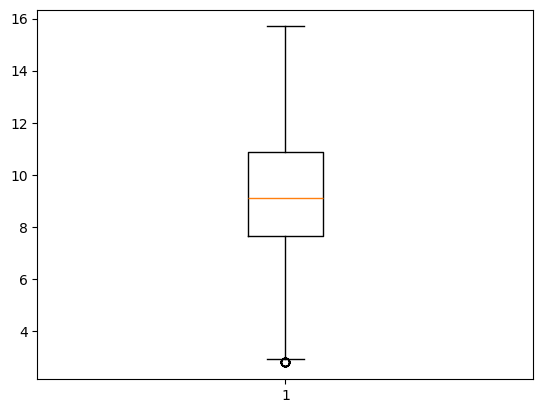

In [34]:
plt.boxplot('duration',data=df)

In [35]:
df.drop('balance',axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x17752e24410>,
 'caps': [<matplotlib.lines.Line2D at 0x17752e24980>,
 'boxes': [<matplotlib.lines.Line2D at 0x17752e24230>],
 'medians': [<matplotlib.lines.Line2D at 0x17752e24ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17752e25190>],
 'means': []}

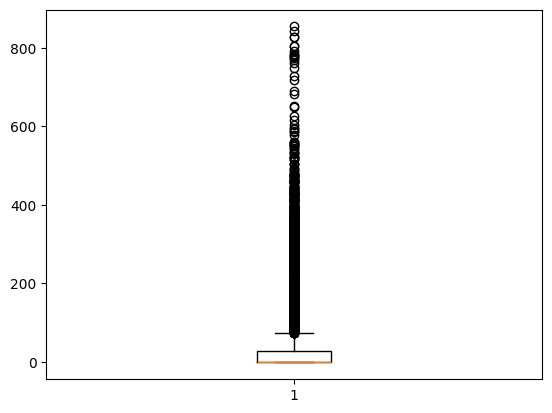

In [36]:
plt.boxplot('pdays',data=df)

In [37]:
df['pdays'], _ = stats.boxcox(df['pdays'] + abs(df['pdays'].min()) + 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x17752e75c10>,
 'caps': [<matplotlib.lines.Line2D at 0x17752e760f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17752e759a0>],
 'medians': [<matplotlib.lines.Line2D at 0x17752e76630>],
 'fliers': [<matplotlib.lines.Line2D at 0x17752e76900>],
 'means': []}

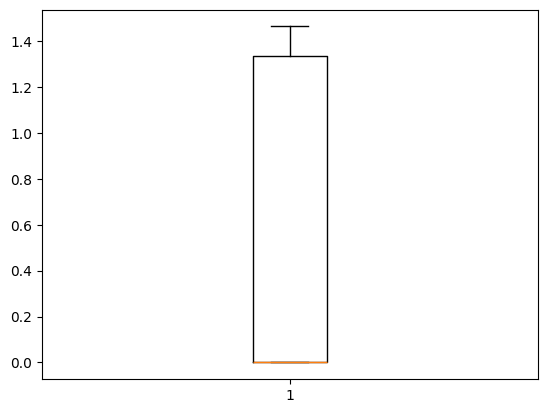

In [38]:
plt.boxplot('pdays',data=df)

In [39]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['duration', 'campaign', 'pdays', 'previous','balance_by_job']

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [40]:
df.columns

Index(['job_0', 'job_1', 'job_2', 'job_3', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'balance_by_job', 'deposit', 'age_bin_young',
       'age_bin_middle_aged', 'age_bin_senior', 'age_bin_elderly'],
      dtype='object')

In [41]:
df=df[['age_bin_young', 'age_bin_middle_aged',
       'age_bin_senior', 'age_bin_elderly', 'job_0', 'job_1', 'job_2', 'job_3',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default',  'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 
       'balance_by_job','deposit']]

In [42]:
df.head()

,age_bin_young,age_bin_middle_aged,age_bin_senior,age_bin_elderly,job_0,job_1,job_2,job_3,marital_divorced,marital_married,...,loan,contact,day,month,duration,campaign,pdays,previous,balance_by_job,deposit
0,False,False,True,False,0,0,0,1,False,True,...,0,0,5,5,1.670281,-0.555003,-0.584482,-0.363857,-0.934704,1
1,False,False,True,False,0,0,0,1,False,True,...,0,0,5,5,2.156709,-0.555003,-0.584482,-0.363857,-0.934704,1
2,False,True,False,False,0,0,1,0,False,True,...,0,0,5,5,2.077144,-0.555003,-0.584482,-0.363857,0.076387,1
3,False,False,True,False,0,0,1,1,False,True,...,0,0,5,5,0.896847,-0.555003,-0.584482,-0.363857,-1.256453,1
4,False,False,True,False,0,0,0,1,False,True,...,0,0,5,5,1.087712,-0.183055,-0.584482,-0.363857,-0.934704,1


<Axes: >

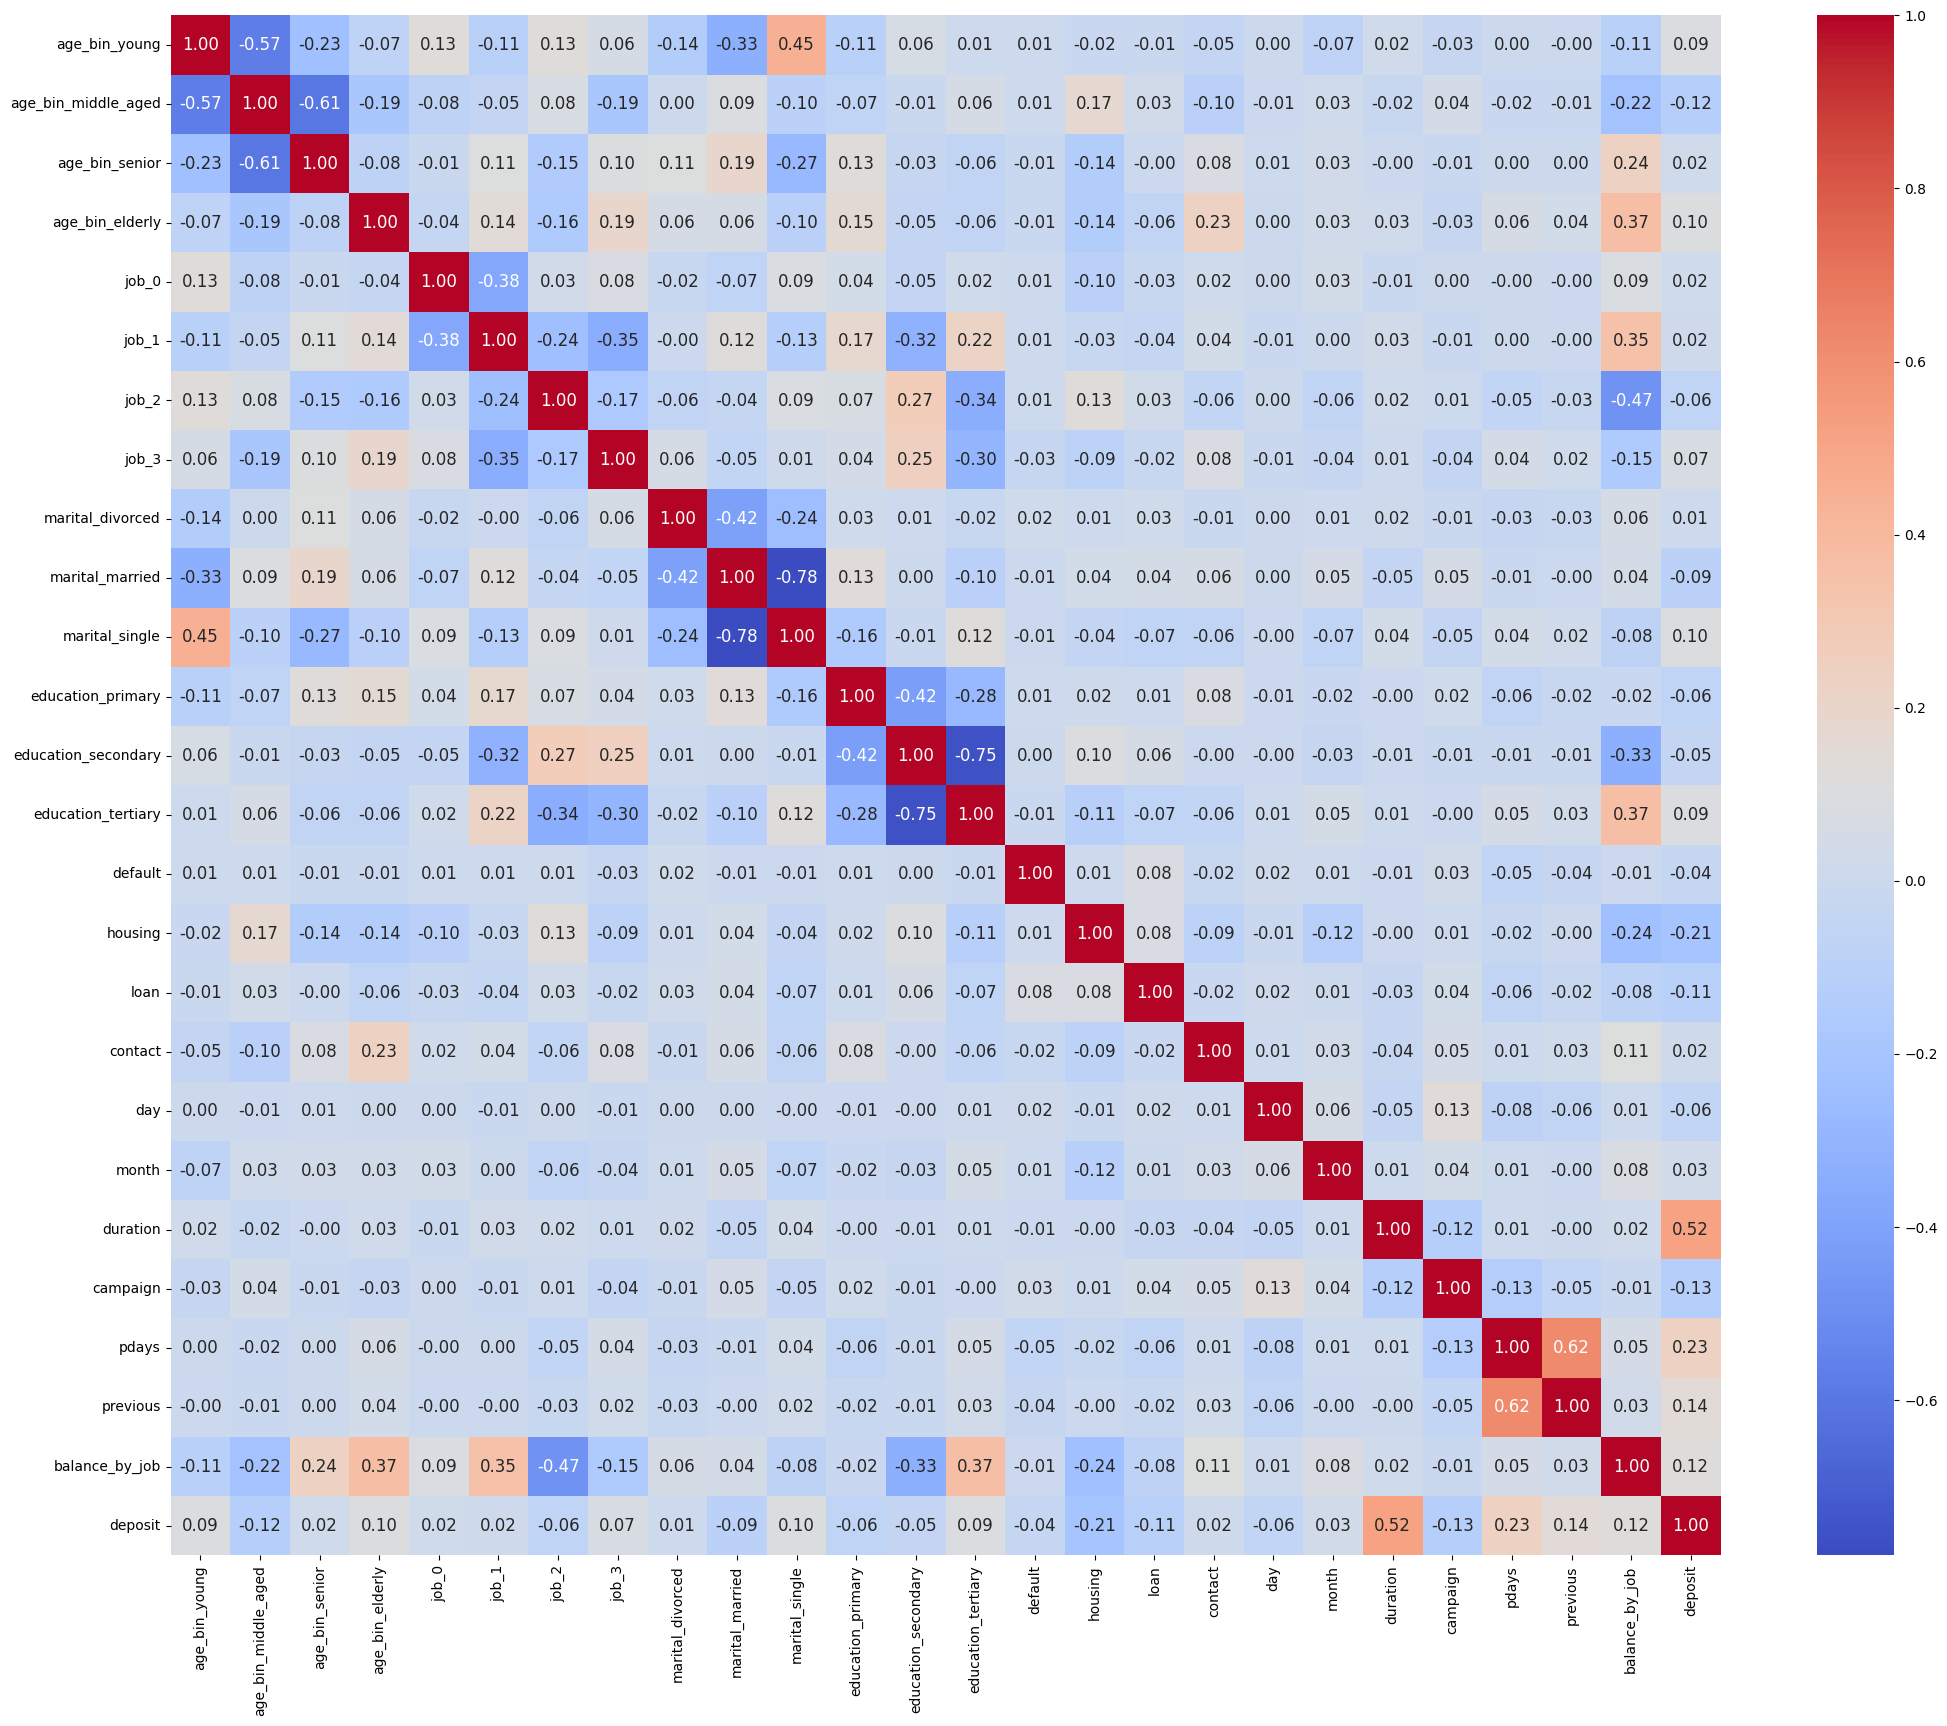

In [43]:
#plotting a heatmap from the correlation between features.
corr_matrix=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix,annot=True,annot_kws=dict(size=12),cmap='coolwarm', fmt='.2f')

In [44]:
# Create a function for model evaluations
from sklearn import metrics

def evaluate(X_test, y_test, predict, X, y, model):
    accuracy = model.score(X_test, y_test)
    print(f'Accuracy: {accuracy}')
    
    Precision = metrics.precision_score(y_test, predict,average='weighted')
    print(f'Precision: {Precision}')
    
    Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
    print(f'Sensitivity recall: {Sensitivity_recall}')
    
    F1_score = metrics.f1_score(y_test,predict,average='weighted')
    print(f'F1 score: {F1_score}')
    
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'Cross Validation Scores: {cv_scores}')

In [45]:
# Create a function to plot Confusion Matrix
def conmat(y_test,predict):
    y_test = np.array(y_test) 
    predict = np.array(predict)
    
    confusion_matrix = metrics.confusion_matrix(y_test, predict)
    classes = np.unique(y_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=classes)
    cm_display.plot()
    plt.show()

## Model Selection:
### This part will also showcase various models that can be applied. Based on the given data, Random Forest should yield the best results (hence, it is the first model to be fitted).


### Random Forest Classifier

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame and 'target' is your target column
X = df.drop('deposit', axis=1)
# X = df.drop('balance_duration', axis=1)
y = df['deposit']
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model
model = RandomForestClassifier(random_state=42,**grid_search.best_params_)
model.fit(X_train_scaled, y_train)
predict=model.predict(X_test_scaled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [49]:
#Evaluate Random Forest:
evaluate(X_test_scaled, y_test, predict, X, y, model)

Accuracy: 0.8498647430117223
Precision: 0.8507217032421039
Sensitivity recall: 0.8498647430117223
F1 score: 0.8499738153796451
Cross Validation Scores: [0.7889991  0.73748309 0.77176364 0.84167794 0.82724402]


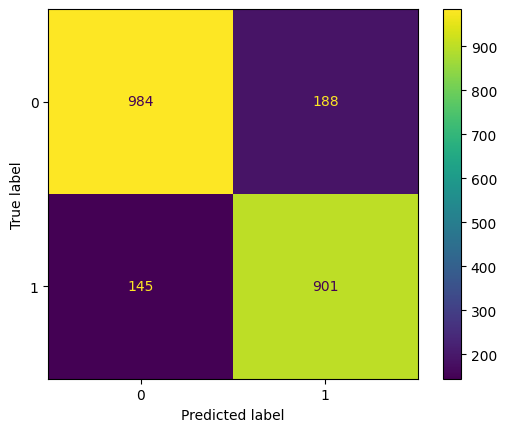

In [50]:
#Confusion Matrix for Random Forest:
conmat(y_test,predict)

### Decision Tree Classifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled,y_train)

model=DecisionTreeClassifier(random_state=42,**grid_search.best_params_)
model.fit(X_train_scaled, y_train)
predict=model.predict(X_test_scaled)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [54]:
selected_features= df.drop(columns=['deposit']).columns.tolist()

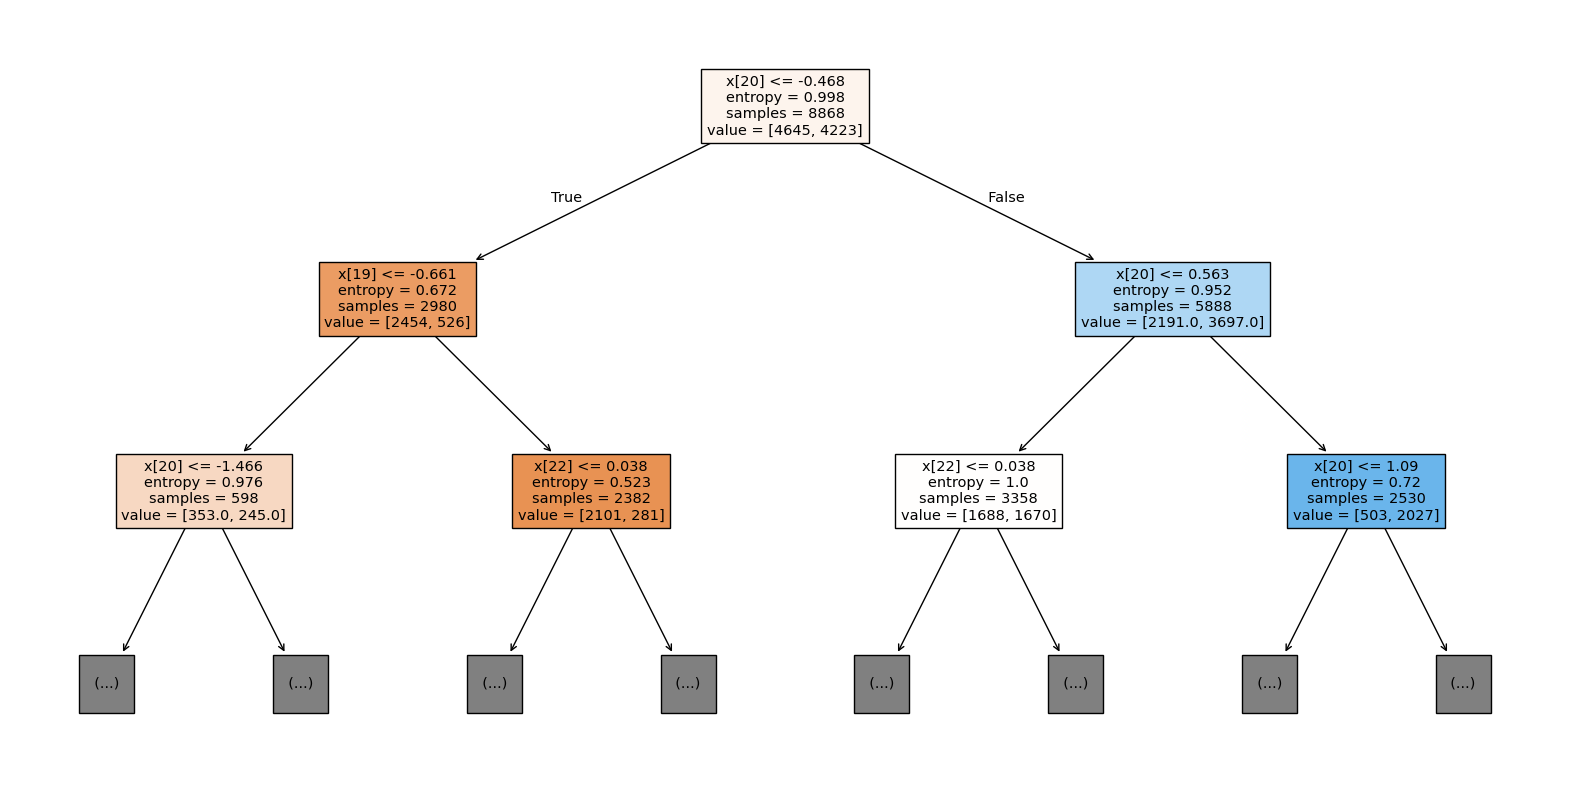

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,filled=True,max_depth=2)
plt.show()

In [56]:
#Evaluate the Decision Tree:
evaluate(X_test_scaled,y_test,predict,X,y,model)

Accuracy: 0.821009918845807
Precision: 0.8217068639917104
Sensitivity recall: 0.821009918845807
F1 score: 0.8211299233203626
Cross Validation Scores: [0.82777277 0.74424899 0.74695535 0.79882724 0.81686964]


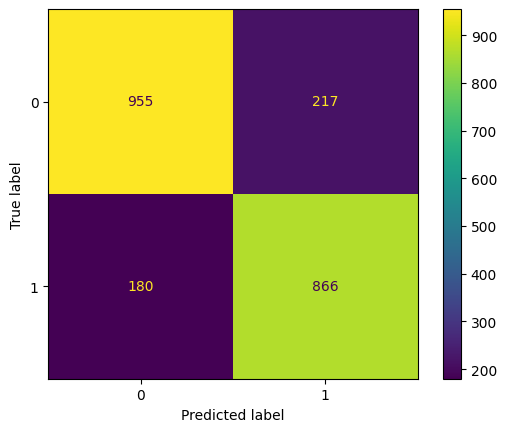

In [57]:
conmat(y_test,predict)

### Logistic Regression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42,)

param_grid={
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None],
    'tol': [1e-4, 1e-3, 1e-2]
}

grdsrch=GridSearchCV(estimator=lr,param_grid=param_grid,cv=8,n_jobs=-1,verbose=2)
grdsrch.fit(X_train_scaled,y_train)

lm=LogisticRegression(random_state=42,**grdsrch.best_params_)
lm.fit(X_train_scaled,y_train)
predict=lm.predict(X_test_scaled)

Fitting 8 folds for each of 450 candidates, totalling 3600 fits


D:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [61]:
evaluate(X_test_scaled,y_test,predict,X,y,lm)

Accuracy: 0.8137962128043282
Precision: 0.8145566316953399
Sensitivity recall: 0.8137962128043282
F1 score: 0.8139248356133635
Cross Validation Scores: [0.80658251 0.71808751 0.74650429 0.7992783  0.78033378]


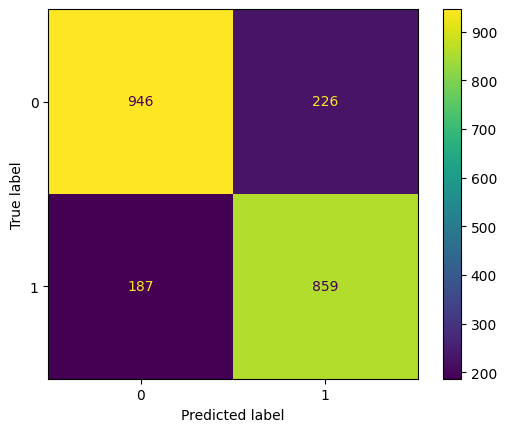

In [62]:
conmat(y_test,predict)

### KNN

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param_grid={
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
gridsearch.fit(X_train_scaled,y_train)
knn=KNeighborsClassifier(**gridsearch.best_params_)
knn.fit(X_train_scaled,y_train)
predict=knn.predict(X_test_scaled)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


In [66]:
evaluate(X_test_scaled,y_test,predict,X,y,knn)

Accuracy: 0.7813345356176736
Precision: 0.7812933162315558
Sensitivity recall: 0.7813345356176736
F1 score: 0.7809904592629059
Cross Validation Scores: [0.5852119  0.65133063 0.75372124 0.8037889  0.77582318]


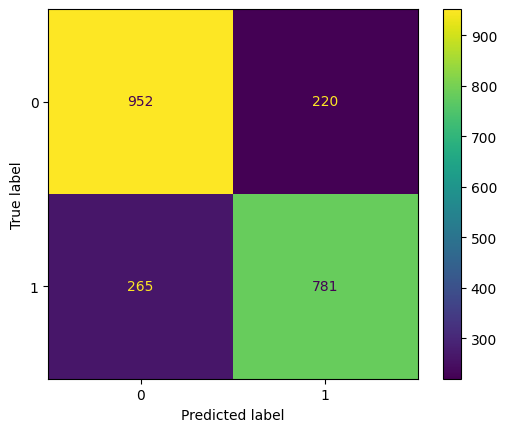

In [67]:
conmat(y_test,predict)

### SVM

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.svm import SVC
svm=SVC(random_state=42,class_weight='balanced')
svm.fit(X_train_scaled,y_train)
predict=svm.predict(X_test_scaled)

In [71]:
evaluate(X_test_scaled,y_test,predict,X,y,svm)

Accuracy: 0.8214607754733995
Precision: 0.82418159865007
Sensitivity recall: 0.8214607754733995
F1 score: 0.8215856604721045
Cross Validation Scores: [0.80658251 0.72034281 0.7699594  0.81100586 0.797023  ]


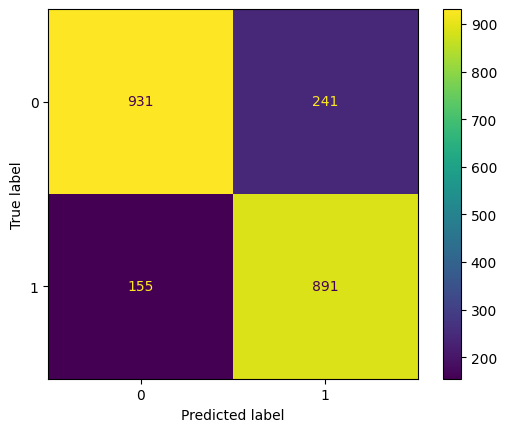

In [72]:
conmat(y_test,predict)

### Sequential Neural Network

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(25,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 611 (2.39 KB)

 Trainable params: 611 (2.39 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6621 - loss: 0.6335 - val_accuracy: 0.7520 - val_loss: 0.5127
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7776 - loss: 0.4773 - val_accuracy: 0.7751 - val_loss: 0.4766
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7872 - loss: 0.4576 - val_accuracy: 0.7723 - val_loss: 0.4717
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7891 - loss: 0.4580 - val_accuracy: 0.7745 - val_loss: 0.4669
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4418 - val_accuracy: 0.7762 - val_loss: 0.4665
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7941 - loss: 0.4412 - val_accuracy: 0.7807 - val_loss: 0.4644
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8119 - loss: 0.4262 - val_accuracy: 0.7790 - val_loss: 0.4641
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7946 - loss: 0.4451 - val_accuracy

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.7286731554848237
Recall: 0.7195671776375113
F1-Score: 0.713667571125968


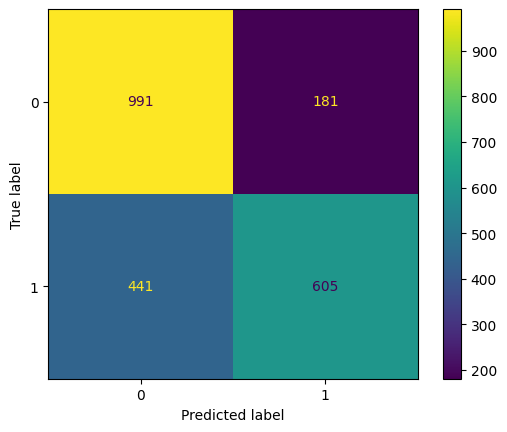

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype("int32")

precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
